In [4]:
from datasets import load_dataset
import json
import os
from pathlib import Path


ds = load_dataset("PolyAI/banking77")
# ds["train"][0] -> {'text': '...', 'label': int}
label_names = ds["train"].features["label"].names
num_labels = len(label_names)  # 77

In [5]:
# Split training data into train and validation sets
train_data = ds["train"]
print(f"Original training set size: {len(train_data)}")

# Split into 80% train, 20% validation using train_test_split
train_val_split = train_data.train_test_split(test_size=0.2, seed=42)
train_split = train_val_split["train"]
val_split = train_val_split["test"]

print(f"Train split size: {len(train_split)}")
print(f"Validation split size: {len(val_split)}")
print(f"\nSample from train split:")
print(train_split[0])

# Prepare test set
test_data = ds["test"]
test_texts = [item["text"] for item in test_data]
test_labels = [item["label"] for item in test_data]

print(f"Test set size: {len(test_texts)}")
print(f"Sample text: {test_texts[0]}")
print(f"Sample label: {label_names[test_labels[0]]}")


Original training set size: 10003
Train split size: 8002
Validation split size: 2001

Sample from train split:
{'text': "If I bought something I didn't like, can I get a refund?", 'label': 52}
Test set size: 3080
Sample text: How do I locate my card?
Sample label: card_arrival


# Visualize disributions

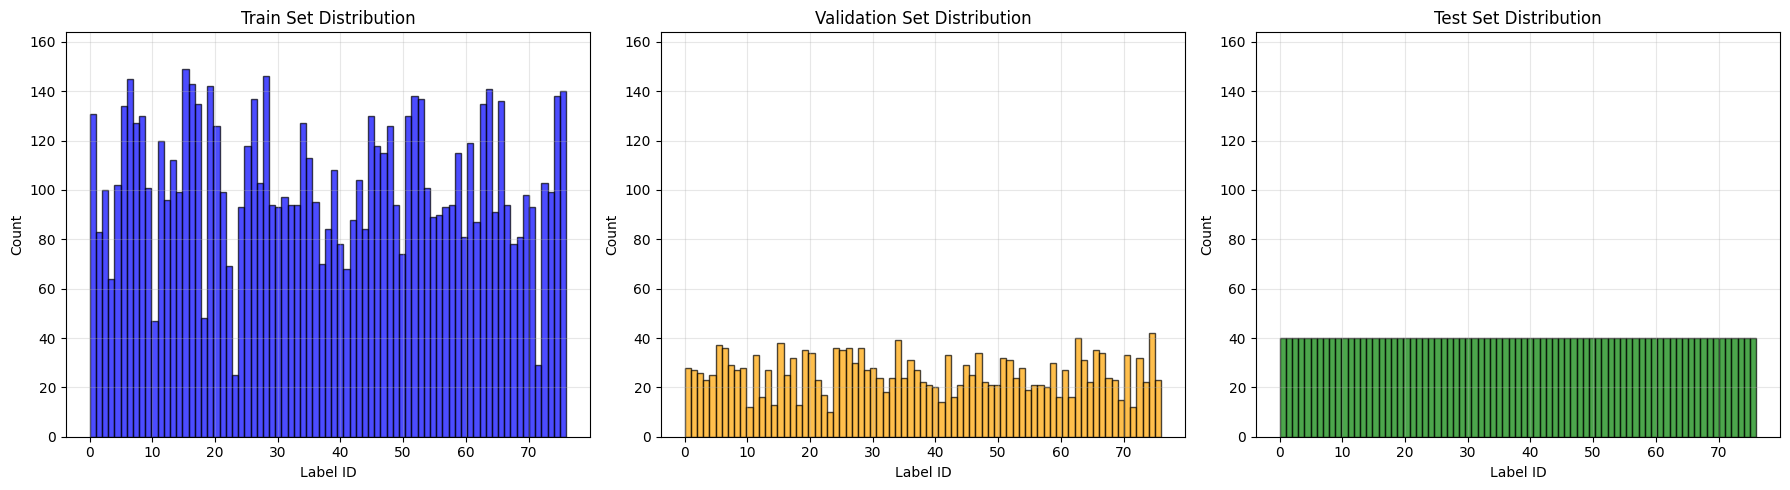


Distribution Statistics

Train Set:
  Total samples: 8002
  Unique labels: 77
  Min count per label: 25
  Max count per label: 149
  Mean count per label: 103.9
  Std count per label: 27.0

Validation Set:
  Total samples: 2001
  Unique labels: 77
  Min count per label: 10
  Max count per label: 42
  Mean count per label: 26.0
  Std count per label: 7.5

Test Set:
  Total samples: 3080
  Unique labels: 77
  Min count per label: 40
  Max count per label: 40
  Mean count per label: 40.0
  Std count per label: 0.0

Distribution Balance Check:
  Train CV: 0.260
  Val CV: 0.288
  Test CV: 0.000
  (Lower CV = more balanced)

Label Distribution Comparison Summary

Train/Val/Test split ratios: 8002/2001/3080
Train:Val ratio: 4.00:1
Train:Test ratio: 2.60:1

✓ All labels present in all splits


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Extract labels from each split
train_labels = [item['label'] for item in train_split]
val_labels = [item['label'] for item in val_split]
test_labels = [item['label'] for item in test_data]

# Calculate label distributions
train_counts = Counter(train_labels)
val_counts = Counter(val_labels)
test_counts = Counter(test_labels)

# Get all unique labels (0-76)
all_labels = sorted(set(train_labels + val_labels + test_labels))

# Create figure with subplots - 1 row, 3 columns for histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram comparison - side by side (three separate histograms)
# Order: Train | Validation | Test
ax1 = axes[0]  # Train
ax1.hist(train_labels, bins=77, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Label ID')
ax1.set_ylabel('Count')
ax1.set_title('Train Set Distribution')
ax1.grid(True, alpha=0.3)

ax1_val = axes[1]  # Validation
ax1_val.hist(val_labels, bins=77, alpha=0.7, color='orange', edgecolor='black')
ax1_val.set_xlabel('Label ID')
ax1_val.set_ylabel('Count')
ax1_val.set_title('Validation Set Distribution')
ax1_val.grid(True, alpha=0.3)

ax1_test = axes[2]  # Test
ax1_test.hist(test_labels, bins=77, alpha=0.7, color='green', edgecolor='black')
ax1_test.set_xlabel('Label ID')
ax1_test.set_ylabel('Count')
ax1_test.set_title('Test Set Distribution')
ax1_test.grid(True, alpha=0.3)

# Set same y-axis limits for better comparison
max_count = max(max(train_counts.values()),
                max(val_counts.values()),
                max(test_counts.values()))
ax1.set_ylim(0, max_count * 1.1)
ax1_val.set_ylim(0, max_count * 1.1)
ax1_test.set_ylim(0, max_count * 1.1)

plt.tight_layout()
plt.show()

# Calculate statistics for text output
train_counts_list = [train_counts.get(label, 0) for label in all_labels]
val_counts_list = [val_counts.get(label, 0) for label in all_labels]
test_counts_list = [test_counts.get(label, 0) for label in all_labels]

# Print distribution statistics
print("\n" + "="*60)
print("Distribution Statistics")
print("="*60)
print(f"\nTrain Set:")
print(f"  Total samples: {len(train_labels)}")
print(f"  Unique labels: {len(train_counts)}")
print(f"  Min count per label: {min(train_counts_list)}")
print(f"  Max count per label: {max(train_counts_list)}")
print(f"  Mean count per label: {np.mean(train_counts_list):.1f}")
print(f"  Std count per label: {np.std(train_counts_list):.1f}")

print(f"\nValidation Set:")
print(f"  Total samples: {len(val_labels)}")
print(f"  Unique labels: {len(val_counts)}")
print(f"  Min count per label: {min(val_counts_list)}")
print(f"  Max count per label: {max(val_counts_list)}")
print(f"  Mean count per label: {np.mean(val_counts_list):.1f}")
print(f"  Std count per label: {np.std(val_counts_list):.1f}")

print(f"\nTest Set:")
print(f"  Total samples: {len(test_labels)}")
print(f"  Unique labels: {len(test_counts)}")
print(f"  Min count per label: {min(test_counts_list)}")
print(f"  Max count per label: {max(test_counts_list)}")
print(f"  Mean count per label: {np.mean(test_counts_list):.1f}")
print(f"  Std count per label: {np.std(test_counts_list):.1f}")

print(f"\nDistribution Balance Check:")
print(f"  Train CV: {np.std(train_counts_list) / np.mean(train_counts_list):.3f}")
print(f"  Val CV: {np.std(val_counts_list) / np.mean(val_counts_list):.3f}")
print(f"  Test CV: {np.std(test_counts_list) / np.mean(test_counts_list):.3f}")
print(f"  (Lower CV = more balanced)")

# Print additional comparison
print("\n" + "="*60)
print("Label Distribution Comparison Summary")
print("="*60)
print(f"\nTrain/Val/Test split ratios: {len(train_labels)}/{len(val_labels)}/{len(test_labels)}")
print(f"Train:Val ratio: {len(train_labels)/len(val_labels):.2f}:1")
print(f"Train:Test ratio: {len(train_labels)/len(test_labels):.2f}:1")

# Check for labels missing in any split
train_label_set = set(train_labels)
val_label_set = set(val_labels)
test_label_set = set(test_labels)

missing_in_val = train_label_set - val_label_set
missing_in_test = train_label_set - test_label_set
missing_in_train = (val_label_set | test_label_set) - train_label_set

if missing_in_val:
    print(f"\n⚠️  Labels in train but missing in validation: {sorted(missing_in_val)}")
if missing_in_test:
    print(f"⚠️  Labels in train but missing in test: {sorted(missing_in_test)}")
if missing_in_train:
    print(f"⚠️  Labels in val/test but missing in train: {sorted(missing_in_train)}")
if not (missing_in_val or missing_in_test or missing_in_train):
    print("\n✓ All labels present in all splits")

In [5]:
load_dataset

<function datasets.load.load_dataset(path: str, name: Optional[str] = None, data_dir: Optional[str] = None, data_files: Union[str, Sequence[str], Mapping[str, Union[str, Sequence[str]]], NoneType] = None, split: Union[str, datasets.splits.Split, NoneType] = None, cache_dir: Optional[str] = None, features: Optional[datasets.features.features.Features] = None, download_config: Optional[datasets.download.download_config.DownloadConfig] = None, download_mode: Union[datasets.download.download_manager.DownloadMode, str, NoneType] = None, verification_mode: Union[datasets.utils.info_utils.VerificationMode, str, NoneType] = None, keep_in_memory: Optional[bool] = None, save_infos: bool = False, revision: Union[str, datasets.utils.version.Version, NoneType] = None, token: Union[bool, str, NoneType] = None, streaming: bool = False, num_proc: Optional[int] = None, storage_options: Optional[Dict] = None, trust_remote_code: bool = None, **config_kwargs) -> Union[datasets.dataset_dict.DatasetDict, da

# Create system prompt

In [6]:
# Extract few-shot examples from training/validation data (NOT from test set)
# This ensures we use real examples from the training distribution
def get_examples_for_labels(dataset_split, label_names, label_name_list, num_examples=3):
    """Get real examples from the dataset for specified labels.
    
    Args:
        dataset_split: The dataset split to search (train_split or val_split)
        label_names: List of all label names
        label_name_list: List of label names to find examples for
        num_examples: Number of examples to return per label
    
    Returns:
        Dict mapping label_name -> list of example texts
    """
    examples = {}
    for label_name in label_name_list:
        try:
            label_id = label_names.index(label_name)
            # Filter dataset for this label
            label_examples = [item for item in dataset_split if item["label"] == label_id]
            # Take up to num_examples
            examples[label_name] = [item["text"] for item in label_examples[:num_examples]]
        except ValueError:
            examples[label_name] = []
    return examples

# Get examples from training data (we can also use validation, but training has more examples)
few_shot_data = get_examples_for_labels(
    train_split, 
    label_names,
    ["card_arrival", "card_delivery_estimate", "card_linking", "activate_my_card", "lost_or_stolen_card", "getting_virtual_card"],
    num_examples=3
)

print("Few-shot examples extracted from training data:")
for label, examples in few_shot_data.items():
    print(f"  {label}: {len(examples)} examples")
    if examples:
        print(f"    - {examples[0][:80]}...")


Few-shot examples extracted from training data:
  card_arrival: 3 examples
    - Could you send me and up date on the arrival of my card?...
  card_delivery_estimate: 3 examples
    - can you express my card to me?...
  card_linking: 3 examples
    - Okay, I found my card, can I put it back in the app?...
  activate_my_card: 3 examples
    - What do I need to do for the card activation?...
  lost_or_stolen_card: 3 examples
    - I left my card at a restaurant and now its missing....
  getting_virtual_card: 3 examples
    - Where do I have access to a virtual card?...


In [7]:
# Create a system prompt for intent classification using numeric IDs
# Using IDs is more reliable and easier to parse than label names
from typing import Optional

# Create the ID mapping string
id_mapping_lines = [f"{i}: {label}" for i, label in enumerate(label_names)]
id_mapping = "\n".join(id_mapping_lines)

# Find IDs for few-shot examples
def get_label_id(label_name: str) -> Optional[int]:
    """Get the numeric ID for a label name."""
    try:
        return label_names.index(label_name)
    except ValueError:
        return None

# Get IDs for common confusing pairs
card_arrival_id = get_label_id("card_arrival")
card_delivery_estimate_id = get_label_id("card_delivery_estimate")
card_linking_id = get_label_id("card_linking")
activate_my_card_id = get_label_id("activate_my_card")
lost_or_stolen_card_id = get_label_id("lost_or_stolen_card")
getting_virtual_card_id = get_label_id("getting_virtual_card")

# Create few-shot examples using REAL examples from training data (not hardcoded)
few_shot_examples = ""
if all(id is not None for id in [card_arrival_id, card_delivery_estimate_id, card_linking_id, activate_my_card_id, lost_or_stolen_card_id, getting_virtual_card_id]):
    # Use the examples extracted from training data in the previous cell
    card_arrival_examples = few_shot_data.get("card_arrival", [])
    card_delivery_estimate_examples = few_shot_data.get("card_delivery_estimate", [])
    card_linking_examples = few_shot_data.get("card_linking", [])
    activate_my_card_examples = few_shot_data.get("activate_my_card", [])
    lost_or_stolen_card_examples = few_shot_data.get("lost_or_stolen_card", [])
    getting_virtual_card_examples = few_shot_data.get("getting_virtual_card", [])
    
    # Get additional examples for other confusing pairs identified in error analysis
    additional_labels = [
        "pin_blocked", "change_pin", "pending_cash_withdrawal", "declined_cash_withdrawal",
        "cash_withdrawal_not_recognised", "verify_my_identity", "why_verify_identity",
        "unable_to_verify_identity", "card_payment_wrong_exchange_rate",
        "wrong_exchange_rate_for_cash_withdrawal", "exchange_rate", "extra_charge_on_statement",
        "card_payment_fee_charged"
    ]
    additional_few_shot_data = get_examples_for_labels(train_split, label_names, additional_labels, num_examples=3)
    
    # Get IDs for additional confusing pairs
    pin_blocked_id = get_label_id("pin_blocked")
    change_pin_id = get_label_id("change_pin")
    pending_cash_withdrawal_id = get_label_id("pending_cash_withdrawal")
    declined_cash_withdrawal_id = get_label_id("declined_cash_withdrawal")
    cash_withdrawal_not_recognised_id = get_label_id("cash_withdrawal_not_recognised")
    verify_my_identity_id = get_label_id("verify_my_identity")
    why_verify_identity_id = get_label_id("why_verify_identity")
    unable_to_verify_identity_id = get_label_id("unable_to_verify_identity")
    card_payment_wrong_exchange_rate_id = get_label_id("card_payment_wrong_exchange_rate")
    wrong_exchange_rate_for_cash_withdrawal_id = get_label_id("wrong_exchange_rate_for_cash_withdrawal")
    exchange_rate_id = get_label_id("exchange_rate")
    extra_charge_on_statement_id = get_label_id("extra_charge_on_statement")
    card_payment_fee_charged_id = get_label_id("card_payment_fee_charged")
    
    # Build few-shot examples section using REAL examples from training data
    examples_lines = ["EXAMPLES TO HELP DISTINGUISH SIMILAR INTENTS:", ""]
    
    # 1. card_arrival vs card_delivery_estimate (CRITICAL - many errors here)
    # Key distinction: card_arrival = asking about YOUR specific card that hasn't arrived
    #                  card_delivery_estimate = asking about general delivery timeframes
    if card_arrival_examples and card_delivery_estimate_examples:
        examples_lines.append(f"1. card_arrival (ID {card_arrival_id}) vs card_delivery_estimate (ID {card_delivery_estimate_id}):")
        examples_lines.append(f"   card_arrival = asking about YOUR specific card that hasn't arrived yet (tracking, status)")
        examples_lines.append(f"   card_delivery_estimate = asking about general delivery timeframes/how long it takes")
        for ex in card_arrival_examples[:3]:  # Use 3 examples to emphasize
            examples_lines.append(f'   - Query: "{ex}" → {card_arrival_id}')
        for ex in card_delivery_estimate_examples[:3]:  # Use 3 examples
            examples_lines.append(f'   - Query: "{ex}" → {card_delivery_estimate_id}')
        examples_lines.append("")
    
    # 2. card_linking vs activate_my_card vs lost_or_stolen_card
    if card_linking_examples and activate_my_card_examples and lost_or_stolen_card_examples:
        examples_lines.append(f"2. card_linking (ID {card_linking_id}) vs activate_my_card (ID {activate_my_card_id}) vs lost_or_stolen_card (ID {lost_or_stolen_card_id}):")
        examples_lines.append(f"   card_linking = reconnecting a card you found/retrieved")
        examples_lines.append(f"   activate_my_card = activating a NEW card for first time")
        examples_lines.append(f"   lost_or_stolen_card = reporting a card as lost/stolen")
        for ex in card_linking_examples[:2]:
            examples_lines.append(f'   - Query: "{ex}" → {card_linking_id}')
        for ex in activate_my_card_examples[:2]:
            examples_lines.append(f'   - Query: "{ex}" → {activate_my_card_id}')
        for ex in lost_or_stolen_card_examples[:2]:
            examples_lines.append(f'   - Query: "{ex}" → {lost_or_stolen_card_id}')
        examples_lines.append("")
    
    # 3. pin_blocked vs change_pin
    if pin_blocked_id is not None and change_pin_id is not None:
        pin_blocked_examples = additional_few_shot_data.get("pin_blocked", [])
        change_pin_examples = additional_few_shot_data.get("change_pin", [])
        if pin_blocked_examples and change_pin_examples:
            examples_lines.append(f"3. pin_blocked (ID {pin_blocked_id}) vs change_pin (ID {change_pin_id}):")
            examples_lines.append(f"   pin_blocked = PIN is locked/blocked, need to unlock")
            examples_lines.append(f"   change_pin = want to change PIN to a new one")
            for ex in pin_blocked_examples[:2]:
                examples_lines.append(f'   - Query: "{ex}" → {pin_blocked_id}')
            for ex in change_pin_examples[:2]:
                examples_lines.append(f'   - Query: "{ex}" → {change_pin_id}')
            examples_lines.append("")
    
    # 4. pending_cash_withdrawal vs declined_cash_withdrawal vs cash_withdrawal_not_recognised
    if (pending_cash_withdrawal_id is not None and declined_cash_withdrawal_id is not None and 
        cash_withdrawal_not_recognised_id is not None):
        pending_cw_examples = additional_few_shot_data.get("pending_cash_withdrawal", [])
        declined_cw_examples = additional_few_shot_data.get("declined_cash_withdrawal", [])
        cw_not_rec_examples = additional_few_shot_data.get("cash_withdrawal_not_recognised", [])
        if pending_cw_examples and declined_cw_examples and cw_not_rec_examples:
            examples_lines.append(f"4. pending_cash_withdrawal (ID {pending_cash_withdrawal_id}) vs declined_cash_withdrawal (ID {declined_cash_withdrawal_id}) vs cash_withdrawal_not_recognised (ID {cash_withdrawal_not_recognised_id}):")
            examples_lines.append(f"   pending_cash_withdrawal = withdrawal is processing/pending")
            examples_lines.append(f"   declined_cash_withdrawal = withdrawal was rejected/declined")
            examples_lines.append(f"   cash_withdrawal_not_recognised = withdrawal not showing in account")
            for ex in pending_cw_examples[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {pending_cash_withdrawal_id}')
            for ex in declined_cw_examples[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {declined_cash_withdrawal_id}')
            for ex in cw_not_rec_examples[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {cash_withdrawal_not_recognised_id}')
            examples_lines.append("")
    
    # 5. verify_my_identity vs why_verify_identity vs unable_to_verify_identity
    if (verify_my_identity_id is not None and why_verify_identity_id is not None and 
        unable_to_verify_identity_id is not None):
        verify_examples = additional_few_shot_data.get("verify_my_identity", [])
        why_verify_examples = additional_few_shot_data.get("why_verify_identity", [])
        unable_verify_examples = additional_few_shot_data.get("unable_to_verify_identity", [])
        if verify_examples and why_verify_examples and unable_verify_examples:
            examples_lines.append(f"5. verify_my_identity (ID {verify_my_identity_id}) vs why_verify_identity (ID {why_verify_identity_id}) vs unable_to_verify_identity (ID {unable_to_verify_identity_id}):")
            examples_lines.append(f"   verify_my_identity = want to verify/complete verification")
            examples_lines.append(f"   why_verify_identity = asking why verification is needed")
            examples_lines.append(f"   unable_to_verify_identity = having trouble completing verification")
            for ex in verify_examples[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {verify_my_identity_id}')
            for ex in why_verify_examples[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {why_verify_identity_id}')
            for ex in unable_verify_examples[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {unable_to_verify_identity_id}')
            examples_lines.append("")
    
    # 6. Exchange rate related confusions
    if (card_payment_wrong_exchange_rate_id is not None and wrong_exchange_rate_for_cash_withdrawal_id is not None and
        exchange_rate_id is not None):
        card_payment_wrong_ex = additional_few_shot_data.get("card_payment_wrong_exchange_rate", [])
        cash_wrong_ex = additional_few_shot_data.get("wrong_exchange_rate_for_cash_withdrawal", [])
        exchange_rate_ex = additional_few_shot_data.get("exchange_rate", [])
        if card_payment_wrong_ex and cash_wrong_ex and exchange_rate_ex:
            examples_lines.append(f"6. card_payment_wrong_exchange_rate (ID {card_payment_wrong_exchange_rate_id}) vs wrong_exchange_rate_for_cash_withdrawal (ID {wrong_exchange_rate_for_cash_withdrawal_id}) vs exchange_rate (ID {exchange_rate_id}):")
            examples_lines.append(f"   card_payment_wrong_exchange_rate = wrong rate used for CARD payment")
            examples_lines.append(f"   wrong_exchange_rate_for_cash_withdrawal = wrong rate used for CASH withdrawal")
            examples_lines.append(f"   exchange_rate = asking about current/general exchange rates")
            for ex in card_payment_wrong_ex[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {card_payment_wrong_exchange_rate_id}')
            for ex in cash_wrong_ex[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {wrong_exchange_rate_for_cash_withdrawal_id}')
            for ex in exchange_rate_ex[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {exchange_rate_id}')
            examples_lines.append("")
    
    # 7. Charge/fee related
    if extra_charge_on_statement_id is not None and card_payment_fee_charged_id is not None:
        extra_charge_ex = additional_few_shot_data.get("extra_charge_on_statement", [])
        card_fee_ex = additional_few_shot_data.get("card_payment_fee_charged", [])
        if extra_charge_ex and card_fee_ex:
            examples_lines.append(f"7. extra_charge_on_statement (ID {extra_charge_on_statement_id}) vs card_payment_fee_charged (ID {card_payment_fee_charged_id}):")
            examples_lines.append(f"   extra_charge_on_statement = unexpected charge on statement")
            examples_lines.append(f"   card_payment_fee_charged = fee charged for card payment")
            for ex in extra_charge_ex[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {extra_charge_on_statement_id}')
            for ex in card_fee_ex[:1]:
                examples_lines.append(f'   - Query: "{ex}" → {card_payment_fee_charged_id}')
            examples_lines.append("")
    
    # 8. getting_virtual_card
    if getting_virtual_card_examples:
        examples_lines.append(f"8. getting_virtual_card (ID {getting_virtual_card_id}):")
        for ex in getting_virtual_card_examples[:2]:
            examples_lines.append(f'   - Query: "{ex}" → {getting_virtual_card_id}')
        examples_lines.append("")
    
    few_shot_examples = "\n".join(examples_lines) if len(examples_lines) > 2 else ""

system_prompt = f"""You are a banking intent classifier. Classify the user's query into one of  {num_labels} banking intents (output is a single integer ID).
                   
IDs:

{id_mapping}

CRITICAL INSTRUCTIONS:
1. Choose exactly one integer ID (0-{num_labels-1}).
2. Reply with ONLY that number. No words, no reasoning, no punctuation.
Examples: 0, 1, 42

EXAMPLES TO HELP DISTINGUISH SIMILAR INTENTS:
{few_shot_examples}

Remember: Respond with ONLY the numeric ID, nothing else."""

print("System prompt created with numeric IDs and few-shot examples")
print(f"Number of labels: {num_labels}")
print(f"ID range: 0-{num_labels-1}")


system_prompt_basic = f"""You are a banking intent classifier. Classify the user's query into one of  {num_labels} banking intents (output is a single integer ID).
                   
IDs:

{id_mapping}

CRITICAL INSTRUCTIONS:
1. Choose exactly one integer ID (0-{num_labels-1}).
2. Reply with ONLY that number. No words, no reasoning, no punctuation.
Examples: 0, 1, 42

Remember: Respond with ONLY the numeric ID, nothing else."""

print(system_prompt)

System prompt created with numeric IDs and few-shot examples
Number of labels: 77
ID range: 0-76
You are a banking intent classifier. Classify the user's query into one of  77 banking intents (output is a single integer ID).

IDs:

0: activate_my_card
1: age_limit
2: apple_pay_or_google_pay
3: atm_support
4: automatic_top_up
5: balance_not_updated_after_bank_transfer
6: balance_not_updated_after_cheque_or_cash_deposit
7: beneficiary_not_allowed
8: cancel_transfer
9: card_about_to_expire
10: card_acceptance
11: card_arrival
12: card_delivery_estimate
13: card_linking
14: card_not_working
15: card_payment_fee_charged
16: card_payment_not_recognised
17: card_payment_wrong_exchange_rate
18: card_swallowed
19: cash_withdrawal_charge
20: cash_withdrawal_not_recognised
21: change_pin
22: compromised_card
23: contactless_not_working
24: country_support
25: declined_card_payment
26: declined_cash_withdrawal
27: declined_transfer
28: direct_debit_payment_not_recognised
29: disposable_card_limits


## Create datasets and save them

In [2]:
# Define the conversion function to be used for all splits (train/validation/test)
def convert_to_sft_format_with_system(dataset_split, label_names, system_prompt, include_label=True, label_is_str=False):
    """Convert banking77 dataset to SFT conversation format WITH system prompt.
    
    Uses numeric IDs instead of label names for more reliable parsing.
    """
    conversations = []
    for item in dataset_split:
        user_text = item["text"]
        label_idx = item["label"]  # This is already the numeric ID (0-76)
        
        # Use the numeric ID as string for the assistant response
        conversation = {
            "messages": [
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_text},
            ]
        }
        conversation['metadata'] = {
            'label': str(label_idx) if label_is_str else label_idx,
            'label_name': label_names[label_idx]
        }
        if include_label:
            conversation["messages"].append({"role": "assistant", "content": str(label_idx)})

        conversations.append(conversation)
    return conversations

def write_conversations(conversations, path):
    with open(path, "w") as f:
        for conv in conversations:
            f.write(json.dumps(conv) + "\n")

In [ ]:
train_conversations = convert_to_sft_format_with_system(train_split, label_names, system_prompt)
val_conversations = convert_to_sft_format_with_system(val_split, label_names, system_prompt)
test_conversations = convert_to_sft_format_with_system(test_data, label_names, system_prompt, include_label=False)
val_no_label_conversations = convert_to_sft_format_with_system(val_split, label_names, system_prompt, include_label=False)

train_conversations_str_metadata = convert_to_sft_format_with_system(train_split, label_names, system_prompt, label_is_str=True)    
val_conversations_str_metadata = convert_to_sft_format_with_system(val_split, label_names, system_prompt, label_is_str=True)    


print(f"Converted {len(train_conversations)} training conversations (with system prompt)")
print(f"Converted {len(val_conversations)} validation conversations (with system prompt)")
print(f"Converted {len(test_conversations)} test conversations (with system prompt)")
print(f"Converted {len(val_no_label_conversations)} validation conversations (without system prompt)")

print(f"\nSample conversation (with system prompt):")
print(json.dumps(train_conversations[0], indent=2))


output_dir = Path("data")
output_dir.mkdir(exist_ok=True)

train_path = output_dir / "banking77_train.jsonl"
val_path = output_dir / "banking77_val.jsonl"
test_path = output_dir / "banking77_test.jsonl"
val_no_label_path = output_dir / "banking77_val_no_label.jsonl"

train_path_str_metadata = output_dir / "banking77_train_str_metadata.jsonl"
val_path_str_metadata = output_dir / "banking77_val_str_metadata.jsonl"


write_conversations(train_conversations, train_path)
write_conversations(val_conversations, val_path)
write_conversations(test_conversations, test_path)
write_conversations(val_no_label_conversations, val_no_label_path)    

write_conversations(train_conversations_str_metadata, train_path_str_metadata)
write_conversations(val_conversations_str_metadata, val_path_str_metadata)


Converted 8002 training conversations (with system prompt)
Converted 2001 validation conversations (with system prompt)
Converted 3080 test conversations (with system prompt)
Converted 2001 validation conversations (without system prompt)

Sample conversation (with system prompt):
{
  "messages": [
    {
      "role": "system",
      "content": "You are a banking intent classifier. Classify the user's query into one of  77 banking intents (output is a single integer ID).\n\nIDs:\n\n0: activate_my_card\n1: age_limit\n2: apple_pay_or_google_pay\n3: atm_support\n4: automatic_top_up\n5: balance_not_updated_after_bank_transfer\n6: balance_not_updated_after_cheque_or_cash_deposit\n7: beneficiary_not_allowed\n8: cancel_transfer\n9: card_about_to_expire\n10: card_acceptance\n11: card_arrival\n12: card_delivery_estimate\n13: card_linking\n14: card_not_working\n15: card_payment_fee_charged\n16: card_payment_not_recognised\n17: card_payment_wrong_exchange_rate\n18: card_swallowed\n19: cash_withdr

In [ ]:
# use basic system prompt
train_conversations_basic = convert_to_sft_format_with_system(train_split, label_names, system_prompt_basic)
val_conversations_basic = convert_to_sft_format_with_system(val_split, label_names, system_prompt_basic)
test_conversations_basic = convert_to_sft_format_with_system(test_data, label_names, system_prompt_basic, include_label=False)
val_no_label_conversations_basic = convert_to_sft_format_with_system(val_split, label_names, system_prompt_basic, include_label=False)


output_dir = Path("data")
output_dir.mkdir(exist_ok=True)

train_path_basic = output_dir / "banking77_train_basic.jsonl"
val_path_basic = output_dir / "banking77_val_basic.jsonl"
test_path_basic = output_dir / "banking77_test_basic.jsonl"
val_no_label_path_basic = output_dir / "banking77_val_no_label_basic.jsonl"


write_conversations(train_conversations_basic, train_path_basic)
write_conversations(val_conversations_basic, val_path_basic)
write_conversations(test_conversations_basic, test_path_basic)
write_conversations(val_no_label_conversations_basic, val_no_label_path_basic)       

# No system prompt

In [3]:
# use empty system prompt
train_conversations_empty_system = convert_to_sft_format_with_system(train_split, label_names, "")
val_conversations_empty_system = convert_to_sft_format_with_system(val_split, label_names, "")
test_conversations_empty_system = convert_to_sft_format_with_system(test_data, label_names, "", include_label=False)
val_no_label_conversations_empty_system = convert_to_sft_format_with_system(val_split, label_names, "", include_label=False)


output_dir = Path("data")
output_dir.mkdir(exist_ok=True)

train_path_empty_system = output_dir / "banking77_train_empty_system.jsonl"
val_path_empty_system = output_dir / "banking77_val_empty_system.jsonl"
test_path_empty_system = output_dir / "banking77_test_empty_system.jsonl"
val_no_label_path_empty_system = output_dir / "banking77_val_no_label_empty_system.jsonl"



write_conversations(train_conversations_empty_system, train_path_empty_system)
write_conversations(val_conversations_empty_system, val_path_empty_system)
write_conversations(test_conversations_empty_system, test_path_empty_system)
write_conversations(val_no_label_conversations_empty_system, val_no_label_path_empty_system)       

NameError: name 'train_split' is not defined